# Project: **Bayesian Optimixstion**

This notebook is a blank slate for you to write in.  Feel free to include figures (don't forget to add/commit them to your repository) and examples.  You can change the kernel (from `Python 3`; see upper right) if the open source project you're writing about does not use Python.  You can write from the prompts below or delete all the cells and start fresh.  Note that Git will always contain your history.

You can run shell commands:

In [1]:
! ls

project.ipynb  README.md


and include code snippets

```c
double square(double x) {
    return x*x;
}
```
or code cells

In [2]:
def square(x):
    return x*x

print(f'square(3) = {square(3)}')

square(3) = 9


The following prompts may be useful, but you don't have to use them.
## About the method

How does the method relate to concepts we've covered in class. You're writing for your fellow classmates so try to make it understandable to them. Why is the method used in this context? Can you explain why it's preferred over some alternative in this context?

### Questions you have about the method

* You can list questions you haven't been able to answer. Perhaps your peers will be able to help answer them. Jed will address some questions in class.

## About the software

Link to the repository. What does the software package do (at a high level)? Who develops it? Who uses it? What language is it written in and what language(s) can it be called from? If there are figures of its architecture, use, or products (e.g., from the docs), you're welcome to include them here. This is an example diagram included in the notebook:

![](https://libceed.readthedocs.io/en/latest/_images/libCEED.png)


## Method as it appears in the software

What role does the method play in the software? How does one call it (perhaps via a higher level interface that uses the method)? Are there particular performance concerns that went into its use? How expensive is it? Can you express performance in terms that are relevant to a user? How about accuracy, conditioning, or stability in the chosen formulation?

### Open questions

* Any open questions you would like to discuss or get help answering?

For this project, I will talk about Bayesian optimization. This is a kind of optimization which use bayesian inferenve and gaussian process. It attemps to find the maximum value of an unknown function in as few iteration as possible. This technique is particularly suited for optimization of high cost functions, situations where the balance between exploration and exploitation is important. I think Bayesian optimization is not only related to optimization we have in class, but also gaussian process as we talked in class. I find it intresting since it is a brand new optimization I have never seen before.  

So Bayesian optimization works by constructing a posterior distribution of functions (gaussian process) that best describes the function you want to optimize. As the number of observations grows, the posterior distribution improves, and the algorithm becomes more certain of which regions in parameter space are worth exploring and which are not, as seen in the picture below.

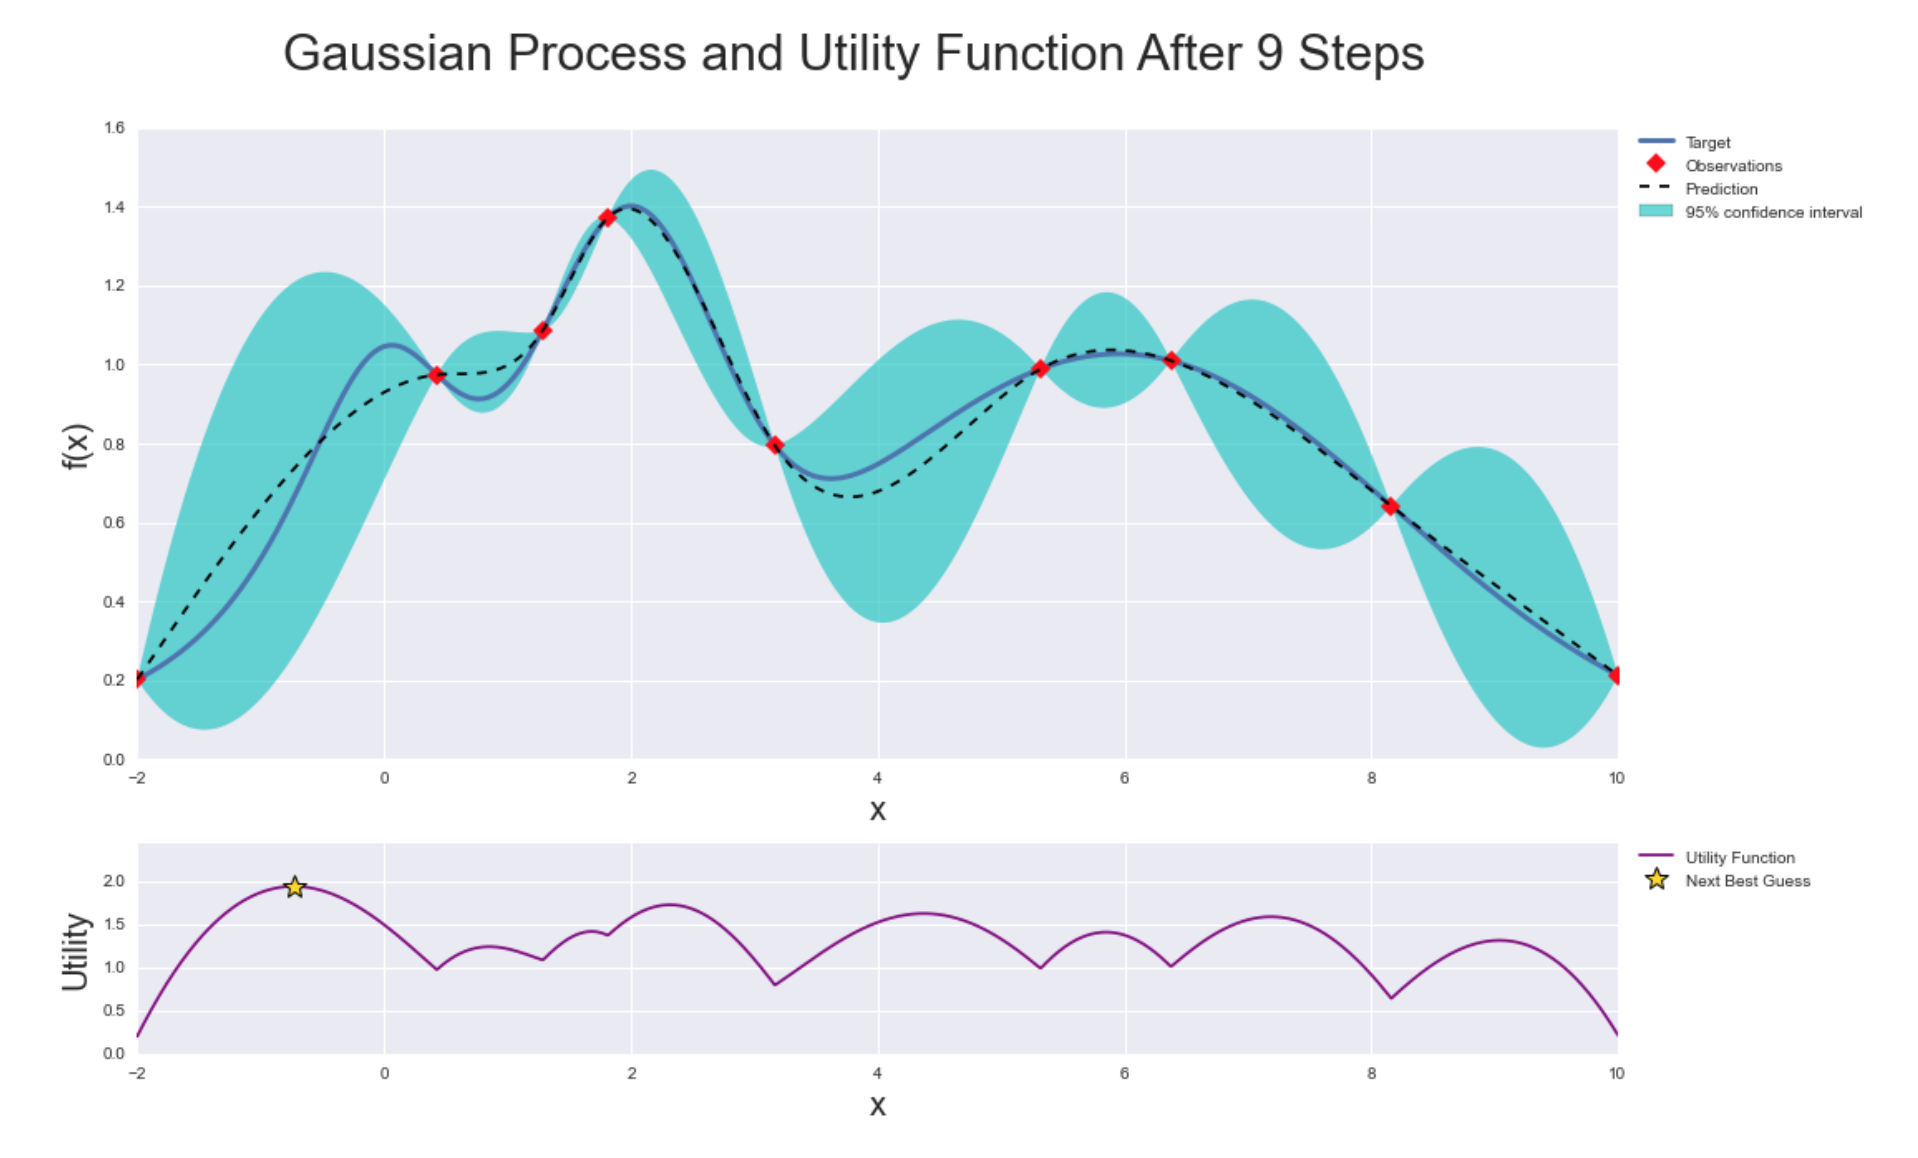

In [8]:
from IPython.display import Image
Image(filename="1.png",width=800, height=1000)

As we iterate over and over, the algorithm balances its needs of exploration and exploitation taking into account what it knows about the target function. At each step a Gaussian Process is fitted to the known samples (points previously explored), and the posterior distribution, combined with a exploration strategy (such as UCB (Upper Confidence Bound), or EI (Expected Improvement)), are used to determine the next point that should be explored.

This process is designed to minimize the number of steps required to find a combination of parameters that are close to the optimal combination. To do so, this method uses a proxy optimization problem (finding the maximum of the acquisition function) that, albeit still a hard problem, is cheaper (in the computational sense) and common tools can be employed. Therefore Bayesian Optimization is most adequate for situations where sampling the function to be optimized is a very expensive endeavor.

This is the link of the software package: https://github.com/fmfn/BayesianOptimization.
It is developped by Fernando Nogueira. It is written in python and also called in python.


Like I said just now, this method is to minimize the number of steps required to find a combination of parameters that are close to the optimal combination. So it is a optimization role in this software. What we concern first is to input a function we want to optimize. Then we should create a BayesianOptimization object. After we doing these steps, we could plot and visualize the algorithm at each step. Since this is kind of find optimal situation by iteration, the accuracy could be promised after some iterations. It is important to notice that the trade off between exploration (exploring the parameter space) and exploitation (probing points near the current known maximum) is fundamental to a succesful bayesian optimization procedure. The larger the initial set of random points explored, the less likely the algorithm is to get stuck in local minima due to being too conservative.

After reading this, I just have one question. Why and how the proxy optimization problem works here